In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sbn

df = pd.read_csv("Country-data.csv")
df.head()

def dbscan(df, e, n):
    
#     Scale the data using StandardScaler function
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
#     Use DBSCAN function of sklearn to scan the data
    scan = DBSCAN(eps=e, min_samples=n)
    scan.fit(df)
    clusters = scan.fit_predict(df)
    return clusters

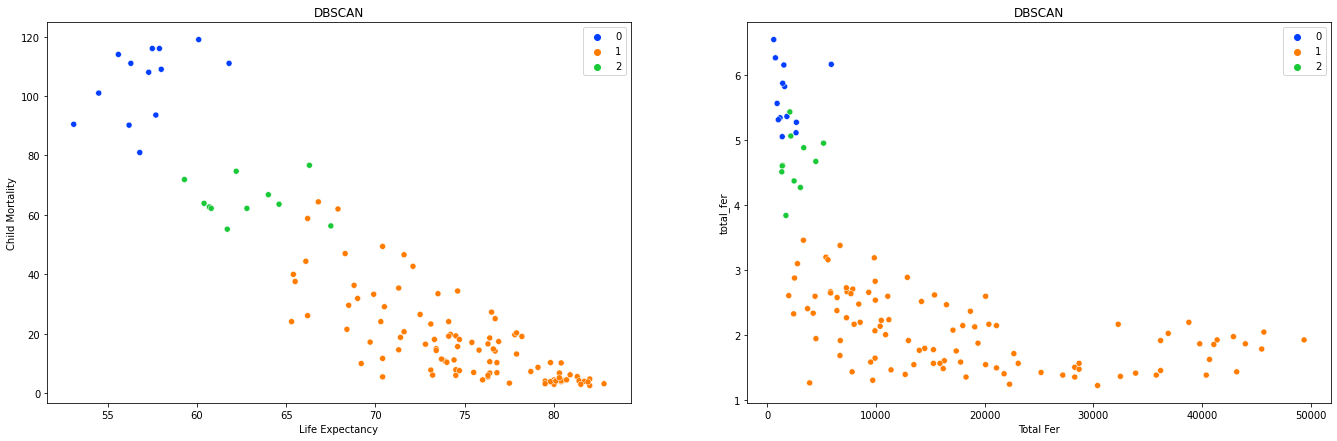

Cluster 0 countries:
['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Malawi', 'Mozambique', 'Uganda']

Cluster 1 countries:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 

In [2]:
# We have found the positive correlation of 5 feature using correlation matrix
dataframe = df.loc[:,["income", "gdpp", "total_fer", "child_mort", "life_expec"]]
clstr_points = dbscan(dataframe, 0.5, 5)
dataframe['clstr'] = clstr_points
dataframe['countries'] = df['country']

# Deleting noise points
new_df = dataframe.drop(dataframe[dataframe.clstr == -1].index)

# Visualizing clusters based onn
plt.figure(figsize=(23, 7))
plt.subplot(1, 2, 1)
sbn.scatterplot(x = 'life_expec', y = 'child_mort', data = new_df, hue = 'clstr', palette = "bright")
plt.legend(loc = "upper right")
plt.title('DBSCAN')
plt.ylabel('Child Mortality')
plt.xlabel('Life Expectancy')
    
plt.subplot(1, 2, 2)
sbn.scatterplot(x = 'income', y = 'total_fer', data = new_df, hue = 'clstr', palette = "bright")
plt.legend(loc = "upper right")
plt.title('DBSCAN')
plt.xlabel('Income')
plt.xlabel('Total Fer')
plt.show()

for cluster in set(clstr_points):
    countries = list(dataframe.loc[dataframe['clstr'] == cluster, 'countries'])
    print ("Cluster {} countries:\n{}\n".format(cluster, countries))